# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# set the counter
counter = 1


print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:
    
    try: 
        response = requests.get(url + "&q=" + city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {counter} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        counter+=1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    
    except:
        print("City not found. Skipping...")
    continue


Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | San Jose
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=san jose
Processing Record 2 | Richards Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=richards bay
Processing Record 3 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=kruisfontein
City not found. Skipping...
City not found. Skipping...
Processing Record 4 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=nikolskoye
Processing Record 5 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=nouadhibou
Processing Record 6 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b

Processing Record 56 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=los llanos de aridane
Processing Record 57 | Erice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=erice
City not found. Skipping...
City not found. Skipping...
Processing Record 58 | Hailar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=hailar
Processing Record 59 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=pevek
Processing Record 60 | Cartagena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=cartagena
Processing Record 61 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=hobart
Processing Record 62 | Kirakira
http://api.openweathermap.org/data/2.5/w

Processing Record 112 | Beira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=beira
Processing Record 113 | Kamaishi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=kamaishi
Processing Record 114 | Makakilo City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=makakilo city
Processing Record 115 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=east london
Processing Record 116 | Belaya Gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=belaya gora
Processing Record 117 | Shenjiamen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=shenjiamen
Processing Record 118 | Klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec1

Processing Record 168 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=dunedin
Processing Record 169 | Plettenberg Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=plettenberg bay
Processing Record 170 | Nelson Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=nelson bay
Processing Record 171 | Okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=okhotsk
Processing Record 172 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=port hardy
Processing Record 173 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=touros
Processing Record 174 | Tver
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd

Processing Record 223 | Medea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=medea
Processing Record 224 | Kurchum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=kurchum
Processing Record 225 | Doka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=doka
Processing Record 226 | Araguaina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=araguaina
Processing Record 227 | Izumo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=izumo
Processing Record 228 | Puerto Escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=puerto escondido
Processing Record 229 | Tucumcari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557

Processing Record 280 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=esperance
Processing Record 281 | High Level
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=high level
Processing Record 282 | Avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=avera
Processing Record 283 | Broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=broome
City not found. Skipping...
City not found. Skipping...
Processing Record 284 | Maragogi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=maragogi
Processing Record 285 | Dhidhdhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=dhidhdhoo
Processing Record 286 | Waipawa
http://api.openweathermap.org/data/2.5/weath

Processing Record 334 | Matagami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=matagami
Processing Record 335 | Usinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=usinsk
City not found. Skipping...
Processing Record 336 | Baglung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=baglung
Processing Record 337 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=talnakh
Processing Record 338 | Kautokeino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=kautokeino
Processing Record 339 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=souillac
Processing Record 340 | Bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec

City not found. Skipping...
Processing Record 389 | Lixourion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=lixourion
Processing Record 390 | Bustamante
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=bustamante
Processing Record 391 | Almaznyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=almaznyy
Processing Record 392 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=faya
City not found. Skipping...
Processing Record 393 | Ovsyanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=ovsyanka
City not found. Skipping...
Processing Record 394 | Verkhoyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=verkhoyansk
Processing Record 395 | Sao Miguel
http://

Processing Record 443 | Thunder Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=thunder bay
City not found. Skipping...
Processing Record 444 | Washington DC.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=washington
Processing Record 445 | Inhambane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=inhambane
Processing Record 446 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=san cristobal
Processing Record 447 | Khingansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=khingansk
Processing Record 448 | Estevan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=estevan
Processing Record 449 | Mora
http://api.openweathermap.org/data/2.5/weather?

Processing Record 499 | Soignies
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=soignies
Processing Record 500 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=saint george
Processing Record 501 | Axim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=axim
Processing Record 502 | Hirara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=hirara
Processing Record 503 | Basse-Pointe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=basse-pointe
Processing Record 504 | Coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=coihaique
Processing Record 505 | Pitimbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b86

Processing Record 555 | Tra Vinh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf74ec173194cc5fd23b8603e5e557&q=tra vinh


In [5]:
weather_df = {
    "City" : city_name,       
    "Cloudiness" : cloudiness,
    "Country" : country,       
    "Date" : date,          
    "Humidity" : humidity,    
    "Lat" : lat,           
    "Lng" : lng,            
    "Max Temp" : max_temp,     
    "Wind Speed" : wind_speed
}
weather_df = pd.DataFrame(weather_df)
weather_df.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df.to_csv('Output_CSV/WeatherPy.csv')
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,San Jose,100,PH,1559690623,57,15.79,120.99,87.53,8.48
1,Richards Bay,0,ZA,1559690697,61,-28.77,32.06,72.05,20.09
2,Kruisfontein,98,ZA,1559690701,55,-34.00,24.73,61.07,5.95
3,Nikolskoye,0,RU,1559690703,55,59.70,30.79,66.20,6.71
4,Nouadhibou,2,MR,1559690704,82,20.93,-17.03,68.00,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

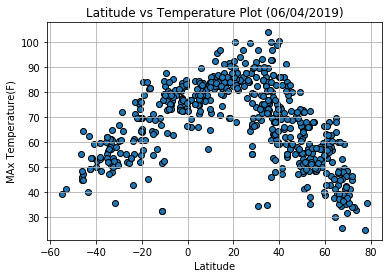

In [11]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],marker="o",edgecolor="black")
plt.title("Latitude vs Temperature Plot (06/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("MAx Temperature(F)")
plt.grid()
plt.savefig("Output_ScPlot/Latitude_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

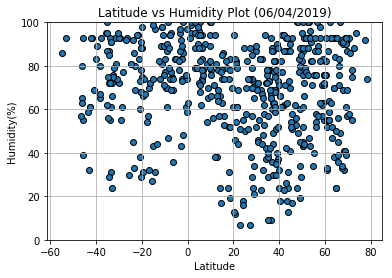

In [12]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],marker="o",edgecolor="black")
plt.title("Latitude vs Humidity Plot (06/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
plt.ylim(0,100)
plt.savefig("Output_ScPlot/Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

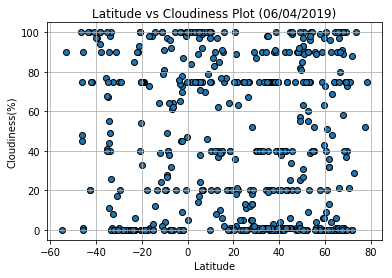

In [13]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],marker="o",edgecolor="black")
plt.title("Latitude vs Cloudiness Plot (06/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.savefig("Output_ScPlot/Latitude_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

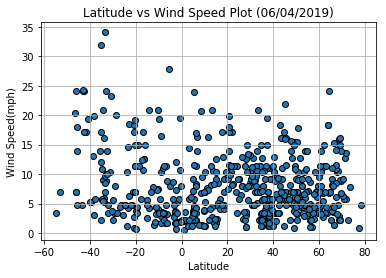

In [14]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],marker="o",edgecolor="black")
plt.title("Latitude vs Wind Speed Plot (06/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid()

plt.savefig("Output_ScPlot/Latitude_vs_Wind_speed.png")
plt.show()